### 1. Introduction: Project Overview

This project centers around the comprehensive analysis of three distinct datasets: movie Data, critic reviews, and user reviews. The scope of the project encompasses various aspects, including:

- Data Cleaning: Ensuring data integrity and quality for accurate analysis.
- Data Analysis: Identifying and evaluating the best movies based on various metrics.
- Data Visualization: Creating insightful visual representations of the data to facilitate understanding.
- Linear Regression: Applying statistical methods to predict audience scores based on relevant features.
- Natural Language Processing (NLP): Analyzing textual data from reviews to extract meaningful insights.

Below are the summarized details of the three datasets presented in their respective dictionaries:

#### Data Dictionary for `Movies`

| Column Name               | Data Type | Description                                                                                           |
| ------------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `movieId`                 | object    | Unique identifier for each movie.                                                                     |
| `movieYear`               | int64     | The year the movie was released.                                                                      |
| `movieURL`                | object    | URL to the movie's page on Rotten Tomatoes.                                                           |
| `movieTitle`              | object    | The title of the movie.                                                                               |
| `critic_score`            | float64   | Average score given by critics for the movie.                                                         |
| `critic_sentiment`        | object    | Sentiment of the critic's reviews (e.g., positive, negative, neutral).                                 |
| `audience_score`          | float64   | Average score given by audience members for the movie.                                                |
| `audience_sentiment`      | object    | Sentiment of audience reviews (e.g., positive, negative, neutral).                                     |
| `release_date_theaters`   | object    | The release date of the movie in theaters.                                                            |
| `release_date_streaming`  | object    | The release date of the movie on streaming platforms.                                                 |
| `rating`                  | object    | The movie's rating (e.g., PG, PG-13, R).                                                              |
| `original_language`       | object    | The original language of the movie (e.g., English, French).                                           |
| `runtime`                 | object    | The runtime of the movie in minutes (may be stored as text in some cases, e.g., "120 minutes").       |

<br/>

#### Data Dictionary for `Critic Reviews`

| Column Name         | Data Type | Description                                                                                           |
| ------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| `reviewId`          | int64     | Unique identifier for each critic review.                                                             |
| `movieId`           | object    | Unique identifier for the movie that the review corresponds to.                                        |
| `creationDate`      | object    | The date when the review was created or published.                                                     |
| `criticName`        | object    | The name of the critic who wrote the review.                                                           |
| `criticPageUrl`     | object    | URL to the critic's page on Rotten Tomatoes or the publication website.                                |
| `reviewState`       | object    | The state of the review (e.g., published, draft).                                                      |
| `isFresh`           | bool      | A boolean indicator whether the review is categorized as "Fresh" (positive review).                    |
| `isRotten`          | bool      | A boolean indicator whether the review is categorized as "Rotten" (negative review).                   |
| `isRtUrl`           | object    | URL to the Rotten Tomatoes page for this review (if available).                                        |
| `isTopCritic`       | bool      | A boolean indicator whether the review was written by a "Top Critic" on Rotten Tomatoes.               |
| `publicationUrl`    | object    | URL to the publication's homepage or the article containing the review.                                |
| `publicationName`   | object    | The name of the publication where the review was published.                                            |
| `reviewUrl`         | object    | Direct URL to the individual review page on the publication's website.                                 |
| `quote`             | object    | A brief excerpt or quote from the review.                                                              |
| `scoreSentiment`    | object    | The sentiment of the review (e.g., positive, negative).                                                |
| `originalScore`     | object    | The original score given by the critic, if available.                                |

<br/>

#### Data Dictionary for `User Reviews`

| Column Name        | Data Type | Description                                                                                           |
| ------------------ | --------- | ----------------------------------------------------------------------------------------------------- |
| `movieId`          | object    | Unique identifier for the movie that the user review corresponds to.                                   |
| `rating`           | float64   | The rating given by the user, typically a score between 0 and 10 (or similar scale).                   |
| `quote`            | object    | A brief excerpt or comment from the user's review.                                                     |
| `reviewId`         | object    | Unique identifier for each user review.                                                                |
| `isVerified`       | bool      | A boolean indicating whether the user who wrote the review is a verified user.                         |
| `isSuperReviewer`  | bool      | A boolean indicating whether the user is marked as a "Super Reviewer" (frequent and/or trusted user).  |
| `hasSpoilers`      | bool      | A boolean indicating whether the review contains spoilers.                                             |
| `hasProfanity`     | bool      | A boolean indicating whether the review contains profanity.                                            |
| `score`            | float64   | The score given by the user (if different from `rating`).                                              |
| `creationDate`     | object    | The date when the user review was created or published.                                                |
| `userDisplayName`  | object    | The display name of the user who wrote the review.                                                     |
| `userRealm`        | object    | The region or realm associated with the user (could be location-based information).                    |
| `userId`           | object    | Unique identifier for the user who wrote the review.                                                   |


### 2. Importing Libraries and Loading Data
To start our analysis, we import the necessary libraries for data manipulation, visualization, and natural language processing (NLP). Libraries such as Pandas, Matplotlib, Seaborn, NLTK, and Scikit-learn provide powerful tools for handling our datasets.

We then load three CSV files containing movie details, critic reviews, and user reviews into separate DataFrames. This is the foundation for our analysis and will allow us to combine different perspectives on movies.

In [1]:
import os
import gdown
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from tqdm import tqdm
import nltk
import time
import ast
from nltk import pos_tag
from collections import Counter
import gc
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import spacy
import plotly.graph_objects as go

In [2]:
# Load in smaller chunks instead of all at once
def download_and_load_csv_in_chunks(file_id, filename, chunk_size=10000, low_memory=True, dtype=None):
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, filename, quiet=True)

    # Use chunksize to load in small portions
    df_chunks = pd.read_csv(filename, low_memory=low_memory, dtype=dtype, chunksize=chunk_size)

    # Combine chunks to process them incrementally
    return pd.concat(df_chunks, ignore_index=True)

# Google Drive file IDs
file_ids = {
    'movies': '19lYJrl5eTUCyBa0rieheC4i5sIIOlotz',
    'critic_reviews': '10XvJsU0vT8KK9-krIutzTMFN1NCGrXVD',
    'user_reviews': '1nFDc_qCWm0AxJfGy653LMycMvUt7K-B3'
}

# Now load using the chunked approach
movies = download_and_load_csv_in_chunks(file_ids['movies'], 'movies.csv', chunk_size=10000, low_memory=False)
critic_reviews = download_and_load_csv_in_chunks(file_ids['critic_reviews'], 'critic_reviews.csv',chunk_size=10000, low_memory=False, dtype={'isRtUrl': 'boolean'})
user_reviews = download_and_load_csv_in_chunks(file_ids['user_reviews'], 'sampled_user_reviews.csv',chunk_size=10000, low_memory=False)
print("Datasets loaded successfully in chunks.")

Datasets loaded successfully in chunks.


## 3. Data cleaning

### 3.1. Data Cleaning Functions

**"Camel Case to Snake Case Conversion" Function**

To ensure consistency, we convert column names from camelCase to snake_case using a function called camel_to_snake_manual(). This helps standardize column names for easier analysis and reference.

**"Standardizing Scores" Function**

The standardize_score() function is used to convert different score formats into a uniform scale (from 0 to 10). This allows us to compare scores across critics and users fairly.

**"Converting Runtime" Function**

The convert_runtime_to_minutes() function converts runtime values from hours and minutes format into total minutes. This ensures that runtime information is in a consistent and comparable numerical format.

In [3]:
def camel_to_snake_manual(name):
    result = [name[0].lower()]
    for char in name[1:]:
        if char.isupper():
            result.append('_')
            result.append(char.lower())
        else:
            result.append(char)
    return ''.join(result)

def standardize_score(score):
    try:
        if '/' in score:
            num, denom = map(float, score.split('/'))
            return round((num / denom) * 10, 1)
        else:
            return float(score)
    except:
        return np.nan

def convert_runtime_to_minutes(runtime):
    if isinstance(runtime, str):
        hours, minutes = 0, 0
        if 'h' in runtime:
            parts = runtime.split('h')
            hours = int(parts[0].strip()) * 60
            if 'm' in parts[1]:
                minutes = int(parts[1].strip('m').strip())
        elif 'm' in runtime:
            minutes = int(runtime.strip('m').strip())
        return hours + minutes
    return None

print("Cleaning functions defined.")

Cleaning functions defined.


### 3.2. Cleaning Movie Data
The clean_movies() function cleans the movie dataset by:

- Dropping unnecessary columns (e.g., URLs).
- Converting column names to snake_case.
- Handling missing values for scores, sentiments, and runtime.
- Extracting the release year from different date formats.
- Standardizing the language categories for consistency.

The clean_movies() function encompasses among other thing the three functions previously built: "camel_to_snake_manual", "standardize_score" and "convert_runtime_to_minutes".

The goal is to create a clean and usable dataset ready for merging and further analysis.

In [4]:
def clean_movies(df):
    df_cleaned = df.copy()
    df_cleaned = df_cleaned.drop(columns='movieURL')
    df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

    # Fill missing scores and sentiments
    df_cleaned['critic_score'] = df_cleaned['critic_score'].fillna(df_cleaned['critic_score'].mean())
    df_cleaned['audience_score'] = df_cleaned['audience_score'].fillna(df_cleaned['audience_score'].mean())
    df_cleaned['critic_sentiment'] = df_cleaned['critic_sentiment'].fillna('unknown')
    df_cleaned['audience_sentiment'] = df_cleaned['audience_sentiment'].fillna('unknown')
    df_cleaned['rating'] = df_cleaned['rating'].fillna('unknown')


    # Extract release years
    def extract_year(date_string):
        try:
            return pd.to_datetime(date_string, format='%Y-%m-%d', errors='coerce').year
        except:
            try:
                return pd.to_datetime(date_string, format='%B %d, %Y', errors='coerce').year
            except:
                return pd.NaT

    df_cleaned['release_year_theaters'] = df_cleaned['release_date_theaters'].apply(extract_year)
    df_cleaned['release_year_streaming'] = df_cleaned['release_date_streaming'].apply(extract_year)
    df_cleaned = df_cleaned.drop(columns=['release_date_theaters', 'release_date_streaming'])

    # Round scores
    df_cleaned['critic_score'] = df_cleaned['critic_score'].round(1)
    df_cleaned['audience_score'] = df_cleaned['audience_score'].round(1)

    # Standardize language
    language_mapping = {
        'English (United Kingdom)': 'English',
        'English (Australia)': 'English',
        'British English': 'English',
        'Australian English': 'English',
        'Portuguese (Brazil)': 'Portuguese',
        'Brazilian Portuguese': 'Portuguese',
        'French (France)': 'French',
        'French (Canada)': 'French',
        'Canadian French': 'French',
        'Unknown language': 'Unknown'
    }
    df_cleaned['original_language'] = df_cleaned['original_language'].replace(language_mapping)
    df_cleaned['original_language'].fillna('Unknown')

    # Convert runtime to minutes
    df_cleaned['runtime_in_minutes'] = df_cleaned['runtime'].apply(convert_runtime_to_minutes)
    df_cleaned = df_cleaned.drop(columns='runtime')

    return df_cleaned

movies_cleaned = clean_movies(movies)
print("Movies data cleaned.")

Movies data cleaned.


### 3.3. Cleaning Critic Reviews
The clean_critic_reviews() function:

- Drops irrelevant columns.
- Converts the creation date to a year format.
- Handles missing values and filters out placeholder quotes that are not meaningful.
- Converts critic scores to a standardized range of 1 to 10.

This helps in getting more meaningful data about critics' opinions and ensuring that only relevant quotes and reviews are retained.

In [5]:
def clean_critic_reviews(df):
    df_cleaned = df.copy()
    df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

    columns_to_remove = ['critic_page_url', 'review_state', 'is_rotten', 'is_rt_url', 'publication_url', 'review_url']
    df_cleaned = df_cleaned.drop(columns=columns_to_remove)

    df_cleaned['creation_date'] = dd.to_datetime(df_cleaned['creation_date'], errors='coerce')
    df_cleaned['creation_year'] = df_cleaned['creation_date'].dt.year
    df_cleaned = df_cleaned.drop(columns=['creation_date'])

    df_cleaned['critic_name'] = df_cleaned['critic_name'].fillna('Unknown Critic')
    df_cleaned = df_cleaned.dropna(subset=['quote'])
    df_cleaned = df_cleaned.drop_duplicates(subset=['review_id'], keep='first')

    placeholders = ["full review at Movies for the Masses", "full review in Greek", ".",
                    "click for full review", "Click to read review", "click to read full review",
                    "See website for more details.", "click to read the full review", "(No quote available.)"]
    df_cleaned = df_cleaned[~df_cleaned['quote'].isin(placeholders)]
    df_cleaned = df_cleaned[df_cleaned['quote'].str.len() > 5]

    df_cleaned['standardized_score'] = df_cleaned['original_score'].apply(standardize_score)
    mean_score = df_cleaned['standardized_score'].mean()
    df_cleaned['standardized_score'] = df_cleaned['standardized_score'].fillna(round(mean_score))
    df_cleaned['standardized_score'] = df_cleaned['standardized_score'].apply(lambda x: min(max(round(x), 1), 10))

    df_cleaned = df_cleaned.drop(columns=['original_score'])

    return df_cleaned

critic_reviews_cleaned = clean_critic_reviews(critic_reviews)
print("Critic reviews cleaned.")

Critic reviews cleaned.


### 3.4. Cleaning User Reviews
The clean_user_reviews() function cleans the user reviews by removing irrelevant columns, standardizing scores, and converting dates to a consistent year format. This is necessary for combining user feedback effectively with critic reviews and movie details.


In [6]:
def clean_user_reviews(df):
    df_cleaned = df.copy()
    df_cleaned = df_cleaned.drop(['reviewId', 'userDisplayName', 'isVerified', 'hasSpoilers', 'userRealm', 'hasProfanity', 'isSuperReviewer', 'rating'], axis=1)

    df_cleaned.columns = [camel_to_snake_manual(col) for col in df_cleaned.columns]

    def standardize_score(score):
        return min(10, max(1, round(score * 2)))

    df_cleaned['standardized_score'] = df_cleaned['score'].apply(standardize_score)

    df_cleaned['creation_date'] = pd.to_datetime(df_cleaned['creation_date'], errors='coerce')
    df_cleaned['creation_year'] = df_cleaned['creation_date'].dt.year
    df_cleaned = df_cleaned.drop(columns=['creation_date'])

    return df_cleaned

sampled_user_reviews_cleaned = clean_user_reviews(user_reviews)
print("User reviews cleaned.")

User reviews cleaned.


### 3.5. Merging Datasets
We merged the three cleaned datasets (movies, critic reviews, and user reviews) using the merge_datasets() function. This function:

- Aggregates critic and user reviews to calculate average scores.
- Combines quotes from both critics and users.
- Keeps existing sentiments from the original movie dataset.

This comprehensive dataset provides a complete picture, combining both critic and user perspectives on each movie.

In [7]:
movies_cleaned[["movie_title","rating"]]

,movie_title,rating
0,A Trip to the Moon,unknown
1,The Birth of a Nation,unknown
2,The Cabinet of Dr. Caligari,unknown
3,The Kid,unknown
4,Nosferatu,unknown
...,...,...
10228,Firebrand,R (Brief Gore|Some Violent Content|Sexuality/N...
10229,Woody Woodpecker Goes to Camp,unknown
10230,You'll Never Find Me,unknown
10231,American Dreamer,unknown


In [8]:
# Count the occurrences of "Unknown" and "unknown" in the 'rating' column of movies_clean
rating_counts = movies_cleaned['rating'].value_counts()

# Extract counts for "Unknown" and "unknown"
count_unknown = rating_counts.get("Unknown", 0)  # Returns 0 if "Unknown" is not found
count_unknown_lower = rating_counts.get("unknown", 0)  # Returns 0 if "unknown" is not found

# Display the results
print(f"Count of 'Unknown': {count_unknown}")
print(f"Count of 'unknown': {count_unknown_lower}")


Count of 'Unknown': 0
Count of 'unknown': 2475


## 4. Data Analysis of the movies data 

This section shows the data analysis and the corresponding data visualization for each of the following parts:<br/>

- "Most popular movies of all time"<br/>
- "Most popular 100 movies by critic score"<br/>
- "Most popular 100 movies by combined critic & audience score".<br/>

For this part of the project the clean dataframe called "movies_cleaned" will be used.

### 4.1. Most popular 100 movies by audience score
To identify the 100 most popular movies of all time, we used audience_score as respresentative of popularity, ranked them and listed the top 100.

In [9]:
# most popular movie based on the audience score

pd.set_option('display.max_rows', 100)

top_100_movies = movies_cleaned.sort_values(by=['audience_score', 'movie_year'], ascending=[False, True]).head(100)

top_100_movies[['movie_title', 'audience_score', 'movie_year']]

,movie_title,audience_score,movie_year
1909,The City,100.0,1998
6427,The Light of the Moon,100.0,2017
6442,The Departure,100.0,2017
6678,Momentum Generation,100.0,2018
6698,Longing,100.0,2018
6992,Legend of the Mountain,100.0,2018
7265,Just Say Goodbye,100.0,2019
7280,Haunt,100.0,2019
7345,Hesburgh,100.0,2019
7396,Between Me and My Mind,100.0,2019


### 4.2. Most popular 100 movies by critic score


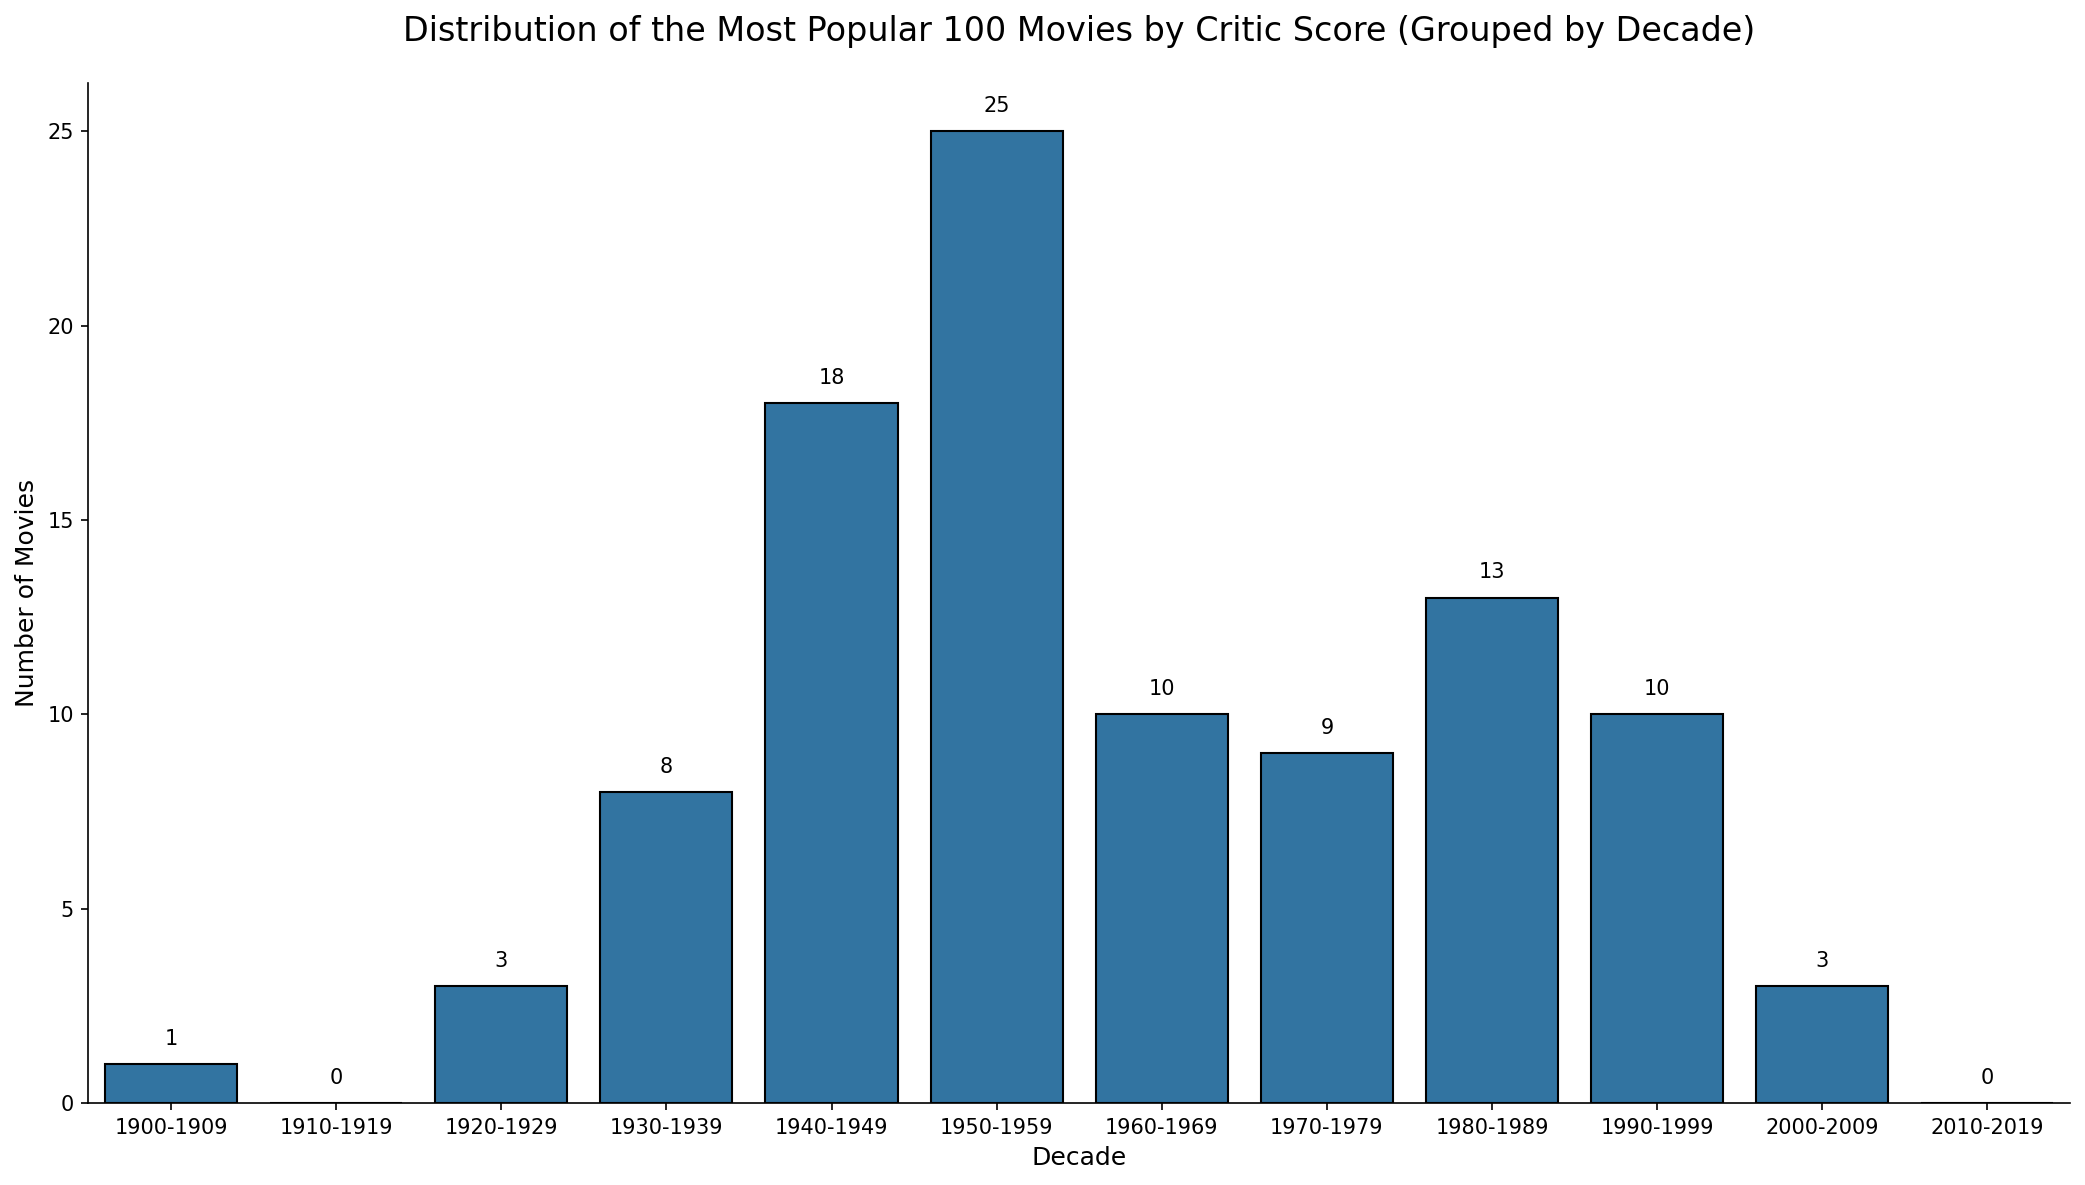

In [10]:
# Sort the movies based on critic score and movie year, and get the top 100
top_100_movies = movies_cleaned.sort_values(by=['critic_score', 'movie_year'], ascending=[False, True]).head(100)

# Define 10-year bins and create a new column to group movie years by decade
bins = range(1900, 2030, 10)  # 10-year bins
labels = [f'{b}-{b+9}' for b in bins[:-1]]  # Create labels for the bins

# Create a new column 'decade' in top_100_movies to categorize movies into 10-year intervals
top_100_movies['decade'] = pd.cut(top_100_movies['movie_year'], bins=bins, labels=labels, right=False)

# Count the number of movies in each decade
decade_counts = top_100_movies['decade'].value_counts().sort_index()

# Set global parameters for text anti-aliasing and sharpness
plt.rcParams['text.antialiased'] = True
plt.rcParams['figure.dpi'] = 150  # Increase DPI for better text sharpness

# Set up the figure with high DPI for sharper text
plt.figure(figsize=(14, 8))  # Increased figure size for better display

# Plot a bar plot with Seaborn for separated bars
ax = sns.barplot(x=decade_counts.index, y=decade_counts.values, edgecolor='black', color='#1f77b4')  # Original blue color

# Set titles and labels with anti-aliasing enabled by default, add pad to title for spacing
plt.title('Distribution of the Most Popular 100 Movies by Critic Score (Grouped by Decade)', fontsize=16, pad=20)  # Adjust the pad value for distance
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Remove the top spine (frame line above the plot)
ax.spines['top'].set_visible(False)
ax.spines["right"].set_visible(False)

# Add numbers above each bar
for index, value in enumerate(decade_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Adjust the layout for better presentation
plt.tight_layout()

# Show the plot
plt.show();

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Set the default renderer to SVG
pio.renderers.default = "svg"

# Get the top 100 most popular movies based on critic_score
top_100_movies_critic_score = movies_cleaned.nlargest(100, 'critic_score')

# Create year bins/intervals for every 10 years (including "1910-1919")
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959',
          '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

# Bin the movie years into intervals, even if a bin is empty
top_100_movies_critic_score['year_interval'] = pd.cut(top_100_movies_critic_score['movie_year'], bins=bins, labels=labels, right=False)

# Create a new DataFrame to consolidate movie titles by year interval, sorted by year
hover_data = top_100_movies_critic_score.groupby('year_interval', observed=False).apply(
    lambda x: '<br>• '.join(
        sorted(
            [f"{title} ({year})" for title, year in zip(x['movie_title'], x['movie_year'])],
            key=lambda y: int(y.split('(')[-1][:-1])
        )
    ),
    include_groups=False
).reset_index(name='movie_title_list')

# Ensure the first movie title in each hover starts with a bullet point
hover_data['movie_title_list'] = '• ' + hover_data['movie_title_list']

# Merge back to include movie titles in the main DataFrame
top_100_movies_critic_score = top_100_movies_critic_score.merge(hover_data, on='year_interval', suffixes=('', '_list'), how='right')

# Create the bar plot
fig = px.bar(
    top_100_movies_critic_score,
    x='year_interval',
    y='critic_score',  # This is just a dummy to create the bars, it doesn't matter
    color_discrete_sequence=['green'],
    hover_name='year_interval',
    hover_data={'movie_title_list': True},  # Show the list of movie titles on hover
    title='Top 100 Movies by Critic Score (Interactive Graph)',
    labels={'year_interval': 'Year Interval', 'critic_score': 'Movies Count'}
)

# Customize hover to show movie titles and other desired info
fig.update_traces(hovertemplate='Movies with best critic score (from past to present):<br><br>%{customdata[0]}')

# Remove y-axis labels since they aren't meaningful here
fig.update_layout(yaxis_title='', yaxis=dict(showticklabels=False))

# Center the title and add the message below it with a small distance from the graph
fig.update_layout(
    title_x=0.5,  # Center the title
    annotations=[
        dict(
            text="All these movies have been rated 100 by the critic. The graph shows these movies grouped by decade.<br>Go with the mouse on a bar to see the list of movies.",
            xref="paper", yref="paper",
            x=0.5, y=1.2,  # Slightly increased 'y' to add space between text and graph
            showarrow=False,
            font=dict(size=12),  # Increased font size
            align="center"
        )
    ],
    xaxis=dict(tickfont=dict(size=10))  # Adjust the font size of x-axis labels (decades)
)

# Show the plot
fig.show()


In [ ]:
# Get the top 100 most popular movies based on critic_score
top_100_movies_critic_score = movies_cleaned.nlargest(100, 'critic_score')

# Create year bins/intervals for every 10 years (including "1910-1919")
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959',
          '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

# Bin the movie years into intervals, even if a bin is empty
top_100_movies_critic_score['year_interval'] = pd.cut(top_100_movies_critic_score['movie_year'], bins=bins, labels=labels, right=False)

# Create a new DataFrame to consolidate movie titles by year interval, sorted by year
hover_data = top_100_movies_critic_score.groupby('year_interval', observed=False).apply(
    lambda x: '<br>• '.join(sorted([f"{title} ({year})" for title, year in zip(x['movie_title'], x['movie_year'])], key=lambda y: int(y.split('(')[-1][:-1])
                                  )), include_groups=False).reset_index(name='movie_title_list')

# Ensure the first movie title in each hover starts with a bullet point
hover_data['movie_title_list'] = '• ' + hover_data['movie_title_list']

# Merge back to include movie titles in the main DataFrame
top_100_movies_critic_score = top_100_movies_critic_score.merge(hover_data, on='year_interval', suffixes=('', '_list'), how='right')

# Create the bar plot
fig = px.bar(
    top_100_movies_critic_score,
    x='year_interval',
    y='critic_score',  # This is just a dummy to create the bars, it doesn't matter
    color_discrete_sequence=['green'],
    hover_name='year_interval',
    hover_data={'movie_title_list': True},  # Show the list of movie titles on hover
    title='Top 100 Movies by Critic Score (Interactive Graph)',
    labels={'year_interval': 'Year Interval', 'critic_score': 'Movies Count'}
)

# Customize hover to show movie titles and other desired info
fig.update_traces(hovertemplate='Movies with best critic score (from past to present):<br><br>%{customdata[0]}')

# Remove y-axis labels since they aren't meaningful here
fig.update_layout(yaxis_title='', yaxis=dict(showticklabels=False))

# Center the title and add the message below it with a small distance from the graph
fig.update_layout(
    title_x=0.5,  # Center the title
    annotations=[
        dict(
            text="All these movies have been rated 100 by the critic. The graph shows these movies grouped by decade.<br>Go with the mouse on a bar to see the list of movies.",
            xref="paper", yref="paper",
            x=0.5, y=1.2,  # Slightly increased 'y' to add space between text and graph
            showarrow=False,
            font=dict(size=12),  # Increased font size
            align="center"
        )
    ],
    xaxis=dict(tickfont=dict(size=10))  # Adjust the font size of x-axis labels (decades)
)

# Show the plot
fig.show();

### 4.3. Top 100 movies by "combined critic & audience score"

In [ ]:
# Calculate the combined score as the average of critic_score and audience_score
movies_cleaned['combined_score'] = (movies_cleaned['critic_score'] + movies_cleaned['audience_score']) / 2

# Get the top 100 movies based on the combined score
top_100_combined_score = movies_cleaned.nlargest(100, 'combined_score')

# Create a new DataFrame to consolidate movie titles by combined score
hover_data = top_100_combined_score.groupby('combined_score').apply(
    lambda x: '<br>• '.join(sorted([f"{title} ({year})" for title, year in zip(x['movie_title'], x['movie_year'])], key=lambda y: int(y.split('(')[-1][:-1])
                                  )), include_groups=False).reset_index(name='movie_title_list')

# Merge back to include movie titles in the main DataFrame
top_100_combined_score = top_100_combined_score.merge(hover_data, on='combined_score')

# Create the scatter plot
fig = px.scatter(
    top_100_combined_score,
    x='combined_score',
    y='combined_score',  # Dummy y-value for the dots
    hover_name='combined_score',
    hover_data={'movie_title_list': True},  # Show the list of movie titles
    title='Top 100 Movies by Combined Critic and Audience Score (interactive graph)',
    size='combined_score',  # Size based on the combined score
    size_max=20,  # Adjust the size of the dots
)

# Update hover template to show bullet points with a line break
fig.update_traces(hovertemplate='Movie titles (from past to present):<br><br>• %{customdata[0]}')

# Center the title
fig.update_layout(title_x=0.5)

# Remove Y-axis as it is not meaningful
fig.update_layout(yaxis_title='', yaxis=dict(showticklabels=False))

# Show the plot
fig.show();

## 5. Data Science Methods
In this chapter, we delve into the application of two widely recognized and powerful data science methodologies: Multiple Linear Regression and Natural Language Processing (NLP). These techniques have been instrumental in extracting deeper insights from the datasets of the project.

### 5.1. Multiple Linear Regression
Multiple Linear Regression is a statistical approach used to model the relationship between multiple independent variables and a dependent variable. This method enables the identification and quantification of the influence of various factors on a particular outcome, thereby providing valuable insights into the underlying patterns within the data. By employing Multiple Linear Regression, significant relationships can be uncovered that enhance the understanding of trends and predictions in the movie industry.
<br/>
<br/>
For the development of the linear regression model, only variables from the "movies" dataset were utilized. To facilitate this process, a copy of the "movies_cleaned" DataFrame was created, ensuring that the original data remained intact while allowing for the necessary analyses to be conducted. Variables from the "critic reviews" and "user reviews" datasets were excluded from this analysis.

In [ ]:
# create a copy of the movies_cleaned dataset
movies_cleaned2 = movies_cleaned.copy()

For our model we will use the following variables:
- "audience_score" as dependent variable;
- "rating","runtime_in_minutes" and "original_language" as independent variables.

Before building the linear regression model we will make some adjustments:

- we will work on the variable "rating";
- we will do some one-hot encoding;
- we will drop the rows with missing values.

In [ ]:
movies_cleaned2.info()

#### 5.1.1. Variable "rating"

The variable "rating" has many different values (see below): 

In [ ]:
#movies_cleaned2.unique()
list(movies_cleaned2.rating.unique())

These values can be grouped in bigger categories. In other words for our regression model we chose to not investigate the rating into detail and therefore we will ignore the details in the braquets and simply consider the general rating of the movie.

In [ ]:
movies_cleaned2['rating'] = movies_cleaned2['rating'].str.extract(r'([A-Z]+(?:-[0-9]+)?)')

# remove "nan" values in the column "rating"
movies_cleaned2 = movies_cleaned2[movies_cleaned2['rating'].notna()]

New values after grouping into the main ratings:

In [ ]:
list(movies_cleaned2.rating.unique())

#### 5.1.2. Variable "runtime_in_minutes"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=movies_cleaned2['runtime_in_minutes'], y=movies_cleaned2['audience_score'])
plt.xlabel('Runtime in Minutes')
plt.ylabel('Audience Score')
plt.title('Runtime vs Audience Score')
plt.show();


Based on the scatterplot, there doesn't appear to be a strong linear correlation between "Runtime in Minutes" and "Audience Score." Including "Runtime in Minutes" in our linear regression model might not significantly improve its predictive power. This is confirmed by the following correlation coefficient (see below):

In [ ]:
correlation = movies_cleaned2['runtime_in_minutes'].corr(movies_cleaned2['audience_score'])
print(correlation)

#### 5.1.3. Variable "critic_score"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=movies_cleaned2['critic_score'], y=movies_cleaned2['audience_score'])
plt.xlabel('Critic Score')
plt.ylabel('Audience Score')
plt.title('Critic Score vs Audience Score')
plt.show();


Based on the scatterplot, there seems to be to be a linear correlation between "Critic Score" and "Audience Score" that is worth bein investigated further. This is confirmed by the following correlation coefficient (see below):

In [ ]:
correlation = movies_cleaned2['critic_score'].corr(movies_cleaned2['audience_score'])
print(correlation)

Therefore we will keep critic score for now.

#### 5.1.4. Dropping irrelevant columns

In [ ]:
movies_cleaned2 = movies_cleaned2.drop(columns=['movie_year','movie_id', 'movie_title', 'original_language', 'release_year_theaters', 'release_year_streaming', 
                                               'runtime_in_minutes', 'combined_score'])

movies_cleaned2.columns

#### 5.1.5. One-hot encoding

We apply "One-hot encoding" for the following non-numerical variables: 'critic_sentiment','audience_sentiment', 'rating'

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Encode the categorical variables 'critic_sentiment' and 'rating'
movies_cleaned2_encoded = pd.get_dummies(movies_cleaned2, columns=['critic_sentiment','audience_sentiment', 'rating'], drop_first=True)

# Columns after encoding will look like:
# 'critic_sentiment_positive', 'rating_R', 'rating_PG-13', etc.
movies_cleaned2_encoded.columns

#### 5.1.6. Conversion of encoded variables from boolean into dummy

In [ ]:
# Combine ratings into broader categories
movies_cleaned2_encoded['rating_Teen'] = (
    movies_cleaned2_encoded['rating_PG-13'] + movies_cleaned2_encoded['rating_TV-14']
)

movies_cleaned2_encoded['rating_Mature'] = (
    movies_cleaned2_encoded['rating_NC-17'] + movies_cleaned2_encoded['rating_R']
)

# Drop the original columns
#movies_cleaned2_encoded.drop(
#    columns=['rating_NC-17', 'rating_PG-13', 'rating_R', 'rating_TV', 'rating_TV-14'],
#    inplace=True
#)

In [ ]:
# Check unique values for each variable
print("Unique values in 'critic_score':", movies_cleaned2_encoded['critic_score'].unique())
print("Unique values in 'critic_sentiment_positive':", movies_cleaned2_encoded['critic_sentiment_positive'].unique())
print("Unique values in 'audience_sentiment_positive':", movies_cleaned2_encoded['audience_sentiment_positive'].unique())
print("Unique values in 'rating_PG':", movies_cleaned2_encoded['rating_PG'].unique())
print("Unique values in 'rating_Teen':", movies_cleaned2_encoded['rating_Teen'].unique())
print("Unique values in 'rating_Mature':", movies_cleaned2_encoded['rating_Mature'].unique())

In [ ]:
# Convert boolean columns to integers (True -> 1, False -> 0)
movies_cleaned2_encoded['critic_sentiment_positive'] = movies_cleaned2_encoded['critic_sentiment_positive'].astype(int)
movies_cleaned2_encoded['critic_sentiment_positive'] = 1 - movies_cleaned2_encoded['critic_sentiment_positive']
movies_cleaned2_encoded['audience_sentiment_positive'] = movies_cleaned2_encoded['audience_sentiment_positive'].astype(int)
movies_cleaned2_encoded['audience_sentiment_positive'] = 1 - movies_cleaned2_encoded['audience_sentiment_positive']
movies_cleaned2_encoded['rating_PG'] = movies_cleaned2_encoded['rating_PG'].astype(int)
movies_cleaned2_encoded['rating_Teen'] = movies_cleaned2_encoded['rating_Teen'].astype(int)
movies_cleaned2_encoded['rating_Mature'] = movies_cleaned2_encoded['rating_Mature'].astype(int)

In [ ]:
# Verify the unique values again
print(f"Unique values in 'critic_sentiment_positive': {movies_cleaned2_encoded['critic_sentiment_positive'].unique()}")
print(f"Unique values in 'audience_sentiment_positive': {movies_cleaned2_encoded['audience_sentiment_positive'].unique()}")
print(f"Unique values in 'rating_PG': {movies_cleaned2_encoded['rating_PG'].unique()}")
print(f"Unique values in 'rating_Teen': {movies_cleaned2_encoded['rating_Teen'].unique()}")
print(f"Unique values in 'rating_Mature': {movies_cleaned2_encoded['rating_Mature'].unique()}")

#### 5.1.7. Handling missing values

In [ ]:
# Check for missing values in the relevant columns
print(movies_cleaned2_encoded[['audience_score','critic_score'] + 
               [col for col in movies_cleaned2_encoded.columns if 'audience_sentiment' in col or 'critic_sentiment' in col or 'rating_' in col]].isnull().sum())


#### 5.1.8. Drop the columns with "unknown" values

In [ ]:
movies_cleaned2_encoded = movies_cleaned2_encoded.drop(columns=["critic_sentiment_unknown", "audience_sentiment_unknown"])

#### 5.1.9. Multicollinearity: calculation of the Variance Inflation Factor (VIF)

Before building the model, we want to check if there is multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated, which can make it difficult for the model to determine their individual effects on the dependent variable.

Variance Inflation Factor measures multicollinearity among the independent variables themselves. So, a high VIF indicates that a predictor has a high linear relationship with one or more of the other predictors in the model, not with the dependent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Define the independent variables
X = movies_cleaned2_encoded[['critic_score', 'audience_sentiment_positive', 'critic_sentiment_positive', 'rating_PG', 'rating_Teen', 'rating_Mature']]

# Add a constant (intercept) to the model
X = add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

Variables with VIF > 5:

- rating_Teen (5.53)
- rating_Mature (6.28)

These two rating variables exhibit moderate to high multicollinearity, which can potentially distort the regression coefficients and make it difficult to assess the individual effect of each variable. 

We will build the model first including both variables and then excluding one of them.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Add a constant (intercept) to the independent variables
x_with_constant = add_constant(movies_cleaned2_encoded[['audience_score', 'audience_sentiment_positive']])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = x_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(x_with_constant.values, i) for i in range(x_with_constant.shape[1])]

# Print the VIF values
print(vif_data)

#### 5.1.10. Linear Regression

In [ ]:
# Define the independent variables (features) and the dependent variable
x = movies_cleaned2_encoded[['critic_score','critic_sentiment_positive', 
                             'audience_sentiment_positive',
                             #'rating_PG', 'rating_Teen']]                  # 0.772
                             #'rating_PG', 'rating_Mature']]                # 0.771
                             'rating_PG', 'rating_Teen', 'rating_Mature']]  # 0.772
                          
y = movies_cleaned2_encoded['audience_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

#### 5.1.11. Interpretation of the results

- critic_score (0.2): the coefficient is lower than expected, yet it is a positive correlation as expected positive. Movies with positive critic sentiment are predicted to have an audience score 0.2 points higher, on average, compared to those without positive critic score, holding other variables constant.
<br>

- critic_sentiment_positive (1): Movies with positive critic sentiment are predicted to have an audience score 0.9 points higher, on average, compared to those without positive critic sentiment, holding other variables constant.
<br>

- audience_sentiment_positive (29): A positive audience sentiment is associated with a significant 29.2-point increase in the predicted audience score, on average, assuming all else remains constant. This makes sense as audience sentiment is closely related to the audience score.
<br>
- rating_PG (2.5): Movies with a PG rating are predicted to have an audience score 2.5 points higher than those without this rating, assuming other variables are constant.
<br>
- rating_Teen (2.1): Movies targeting a "Teen" audience are predicted to have a slightly higher audience score by 2.1 points, on average, compared to those not targeting teens. 
<br>
- rating_Mature (-0.3): Movies rated for a "Mature" audience are predicted to have an audience score 0.3 points lower, on average, compared to those without this rating, assuming other variables remain constant.

#### 5.1.12. Accuracy of the Linear Regression model

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}. This means that 77.2% of the variance in audience_score is explained by the independent variables in your model. This is a strong value, suggesting your model provides a good fit to the data.")
print("")
print(f"Mean Squared Error: {mse}")
print("")
# Calculate variance and standard deviation of audience_score
variance = y_train.var()
std_dev = y_train.std()

print("Variance:", variance)
print("")
print("Standard Deviation:", std_dev)
print("")
if mse < variance:
    print("Mean Squared Error < Variance, hence the model captures much of the variability in audience_score and is performing well.")
else:
    print("The model predictions are not much better than just using the average value as the prediction.")

**End of the Linear Regression Model.**

### 5.2. Natural Language Processing
Natural Language Processing (NLP) is a branch of artificial intelligence that enables computers to understand, interpret, and generate human language. Through the implementation of NLP techniques, we can analyze textual data—such as movie reviews—transforming unstructured information into actionable insights. This allows us to assess sentiment, extract themes, and gauge audience reactions, enhancing our overall understanding of viewer perceptions and preferences.

#### 5.2.1. Cleaning Quotes and Filtering Nouns and Verbs
The first step in our analysis involved cleaning the movie review quotes. We used the process_quotes() function to remove stop words, which are common but uninformative words such as "the," "is," and "and." Additionally, we defined a list of words to exclude, such as general movie-related terms (e.g., "movie," "film") and quality descriptors (e.g., "good," "bad"). By removing these words, we focused the analysis on those words that provide deeper insight into the content and themes of the reviews.

After cleaning, we filtered each cleaned quote to retain only nouns and verbs. This was done using part-of-speech tagging to identify words representing core ideas or actions. This allowed us to focus specifically on key themes, such as "love," "war," or "acting," and highlight the main concepts expressed in the reviews while eliminating less important parts of speech.

In [ ]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)

# Define stop words and words to exclude
stop_words = set(stopwords.words('english'))
words_to_exclude = {
    # General movie-related terms
    'movie', 'film', 'cinema', 'picture', 'flick', 'screening', 'showing',

    # Quality descriptors
    'good', 'bad', 'great', 'terrible', 'excellent', 'poor', 'amazing', 'awful',
    'wonderful', 'horrible', 'best', 'worst', 'favorite', 'liked', 'disliked',

    # Cinema-related terms
    'actor', 'actress', 'director', 'producer', 'screenplay', 'script', 'scene',
    'character', 'plot', 'story', 'dialogue', 'cinematography', 'soundtrack',

    # General descriptors
    'interesting', 'boring', 'exciting', 'dull', 'entertaining', 'disappointing',
    'impressive', 'mediocre', 'overrated', 'underrated',

    # Time-related terms
    'hour', 'minute', 'long', 'short',

    # Viewing experience
    'watch', 'saw', 'seen', 'theater', 'cinema', 'home',

    # Rating-related terms
    'star', 'rating', 'review', 'critic', 'audience',

    # Production-related terms
    'budget', 'box office', 'sequel', 'remake', 'adaptation',

    # General opinion words
    'think', 'thought', 'feel', 'felt', 'believe', 'opinion'
}
stop_words.update(words_to_exclude)

def process_quote(quote):
    # Convert to string if it's a list
    if isinstance(quote, list):
        quote = ' '.join(quote)
    else:
        quote = str(quote)

    # Tokenize and remove stop words and excluded words
    tokens = word_tokenize(quote.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Perform POS tagging
    tagged = pos_tag(tokens)

    # Filter for nouns and verbs
    filtered = [word for word, pos in tagged if pos.startswith('N') or pos.startswith('V')]

    return ' '.join(filtered)

def process_quotes_in_chunks(df, chunk_size=1000):
    processed_chunks = []
    total_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size != 0 else 0)

    for i in tqdm(range(0, len(df), chunk_size), total=total_chunks, desc="Processing chunks"):
        try:
            chunk = df.iloc[i:i+chunk_size].copy()
            chunk['filtered_quotes'] = chunk['all_quotes'].apply(process_quote)
            processed_chunks.append(chunk)
            print(f"Processed chunk {i//chunk_size + 1}/{total_chunks}")
        except Exception as e:
            print(f"An error occurred while processing chunk {i//chunk_size + 1}: {str(e)}")

    return pd.concat(processed_chunks, ignore_index=True)

#### 5.2.2. Word Cloud of Themes

To visualize the most common themes discussed in the movie reviews, we generated a word cloud. The word cloud was created using the cleaned dataset to present an intuitive overview of frequently mentioned topics. By emphasizing the prominent words, it gives a clear picture of what audiences and critics frequently focus on when evaluating movies.

In [ ]:
# Load the processed data

import gdown
import pandas as pd

# Google Drive file ID for the "processed_movie_quotes.csv" file
file_id = '1pPXkjjZaYkFFLShvgCUG53yILh9_SW04'

# Import the "processed_movie_quotes.csv" file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'processed_movie_quotes.csv', quiet=True)

# Load the downloaded "processed_movie_quotes.csv" file into a pandas DataFrame
df = pd.read_csv('processed_movie_quotes.csv')

# Replace NaN with an empty string and convert all values to strings
df['filtered_quotes'] = df['filtered_quotes'].fillna('').astype(str)

# Remove any empty strings
df = df[df['filtered_quotes'] != '']

print("Number of rows after cleaning:", len(df))

In [ ]:
# Function to process quotes in chunks
def process_quotes_chunk(chunk):
    return Counter(' '.join(chunk).split())

# Load and process data in chunks
chunk_size = 1000  # Adjust based on your system's capacity
word_freq = Counter()

print("Processing quotes in chunks...")
start_time = time.time()

for chunk in (df[i:i + chunk_size] for i in range(0, len(df), chunk_size)):
    chunk = chunk.loc[chunk['filtered_quotes'] != '']  # Avoid chained assignment
    chunk['filtered_quotes'] = chunk['filtered_quotes'].fillna('').astype(str)  # No warning
    word_freq.update(process_quotes_chunk(chunk['filtered_quotes']))

    # Clear some memory
    del chunk
    gc.collect()

end_time = time.time()
print(f"Time taken to process all chunks: {end_time - start_time:.2f} seconds")

# Keep only words that appear more than a certain number of times
min_freq = 10
frequent_words = {word: count for word, count in word_freq.items() if count > min_freq}

print(f"Total unique words: {len(word_freq)}")
print(f"Words appearing more than {min_freq} times: {len(frequent_words)}")

# Create a word cloud
def create_word_cloud(word_freq, title):
    wordcloud = WordCloud(
        width=1600, height=800,
        background_color='white',
        max_words=500,
        relative_scaling=0.5
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)  # Dynamic title
    plt.show();

# Separate good and bad movies
median_score = df['average_combined_score'].median()
good_movies = df[df['average_combined_score'] > median_score]
bad_movies = df[df['average_combined_score'] <= median_score]

# Create bigram vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')

# Get bigrams for good and bad movies
good_bigrams = vectorizer.fit_transform(good_movies['filtered_quotes'])
bad_bigrams = vectorizer.transform(bad_movies['filtered_quotes'])

# Calculate ratio of frequencies
good_freq = good_bigrams.sum(axis=0).A1
bad_freq = bad_bigrams.sum(axis=0).A1
ratio = np.log((good_freq + 1) / (bad_freq + 1))

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sort by ratio and get top distinctive bigrams
top_good = sorted(zip(feature_names, ratio), key=lambda x: -x[1])[:20]
top_bad = sorted(zip(feature_names, ratio), key=lambda x: x[1])[:20]


# Your top 20 word lists
highly_rated_top_20 = [
    'miyazaki', 'hepburn', 'pacino', 'hitchcock', 'kubrick', 'kurosawa',
    'leone', 'bogart', 'chaplin', 'brando', 'goodfellas', 'godfather',
    'wilder', 'stewart', 'welles', 'bergman', 'anime', 'coen',
    'almodovar', 'newman'
]

poorly_rated_top_20 = [
    'bond', 'sandler', 'cage', 'cruise', 'twists', 'gore', 'blood',
    'chemistry', 'zombie', 'williams', 'killer', 'romance', 'cgi',
    'vampire', 'carrey', 'adventure', 'murphy', 'surprised',
    'sequels', 'suspense', 'confusing'
]

# Create Counter objects for the word cloud
highly_rated_counter = Counter({word: 1 for word in highly_rated_top_20})
poorly_rated_counter = Counter({word: 1 for word in poorly_rated_top_20})



In [ ]:
create_word_cloud(frequent_words, 'Word Cloud of Movie Quotes (Full Dataset)')

In [ ]:
create_word_cloud(highly_rated_counter, 'Word Cloud of Distinctive Words in Highly-Rated Movies')

In [ ]:
print("Bigrams more associated with highly-rated movies:")
print(', '.join([f'"{bg}"' for bg, _ in top_good]))

In [ ]:
create_word_cloud(poorly_rated_counter, 'Word Cloud of Distinctive Words in Poorly-Rated Movies')

In [ ]:
print("\nBigrams more associated with poorly-rated movies:")
print(', '.join([f'"{bg}"' for bg, _ in top_bad]))

#### 5.2.3. NLP Results

The most distinctive words in highly-rated movies included notable directors like "Miyazaki" and "Hitchcock" as well as iconic actors like "Pacino" and "Hepburn." These names suggest that well-known talents significantly contribute to a movie's success. On the other hand, poorly-rated movies had themes like "gore," "zombie," and "sequels," indicating that certain genres or types of movies tend to receive more critical reviews.

Insights:
- Highly-Rated Movies: The distinctive words associated with highly-rated movies included notable names such as "Miyazaki," "Hitchcock," "Kubrick," and "Bergman." This suggests that acclaimed directors and actors are frequently linked to movies that perform well. Themes like "anime" and "coen" indicate that certain genres or production styles resonate positively with audiences.

- Poorly-Rated Movies: The most distinctive words for poorly-rated movies included "sandler," "cage," "gore," and "zombie." These words suggest that movies featuring certain actors or focusing on specific genres, such as horror, are more likely to receive critical reviews. Words like "sequels" and "twists" also imply that poorly-executed plot twists or over-reliance on sequels may contribute to lower ratings.

These insights help us understand the elements that audiences and critics find appealing or off-putting, providing valuable guidance for movie creators looking to enhance their content and reach wider acclaim.

## 6. Conclusion

This project has been an insightful exploration into the world of data, with significant tasks undertaken and key topics examined in depth. The work demonstrates advanced techniques in data cleaning, manipulation, and visualization. Functions were employed to optimize the code, reducing redundancy and improving overall readability. The data visualization component provided clear and immediate insights into the most popular movies in the industry, utilizing interactive graphs to enhance the presentation and efficiently manage space.

The "Data Science" section highlighted the power of analytical methods in uncovering patterns that are applicable to real-world scenarios.

Furthermore, merging multiple datasets into a cohesive whole was a key element of the project, showcasing an important skill in data analysis. This merged dataset was effectively used in the NLP section to analyze both critic and user reviews, delivering valuable insights into sentiment and opinion within the movie industry.